In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

train_data=pd.read_csv('train_ctrUa4K.csv')
test_data=pd.read_csv('test_lAUu6dG.csv')

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train_data.shape

(614, 13)

In [6]:
test_data.shape

(367, 12)

In [7]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [11]:
train_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
loan_status_counts = train_data['Loan_Status'].value_counts()

loan_status_percentage = loan_status_counts / len(train_data) * 100
print("Loan Approval Status:")
print(loan_status_percentage)

Loan Approval Status:
Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64


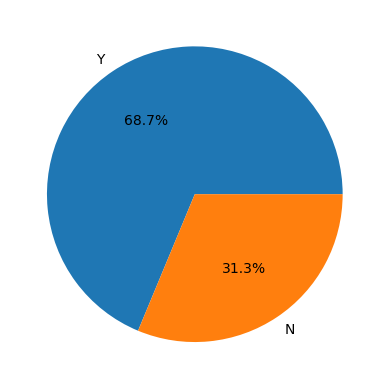

In [13]:
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%');


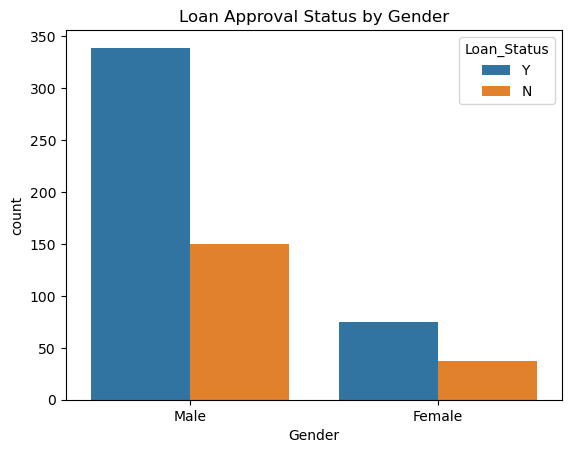

In [14]:
sns.countplot(x='Gender', hue='Loan_Status',data=train_data)
plt.title('Loan Approval Status by Gender')
plt.show()

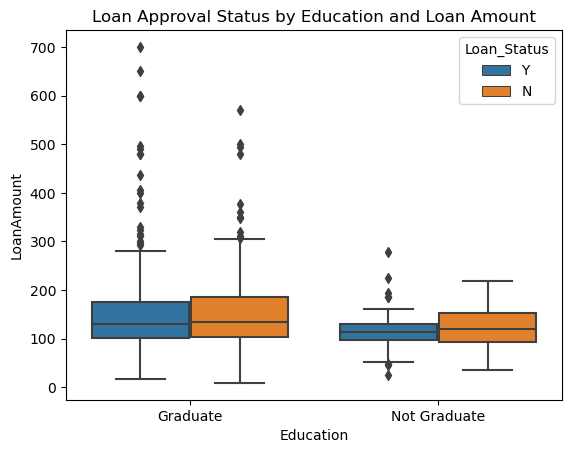

In [15]:
sns.boxplot(x='Education', y='LoanAmount', hue='Loan_Status', data=train_data)
plt.title('Loan Approval Status by Education and Loan Amount')
plt.show()


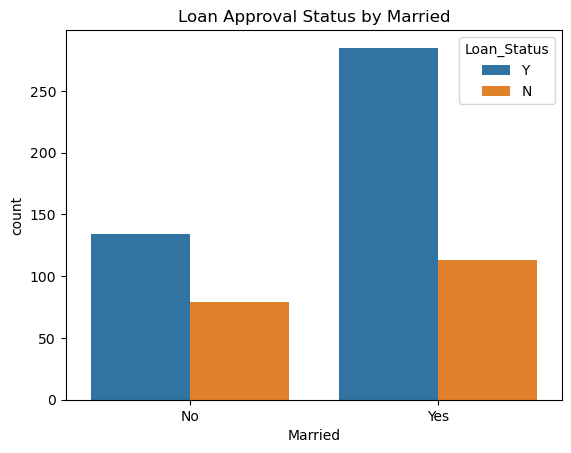

In [16]:
sns.countplot(x='Married', hue='Loan_Status',data=train_data)
plt.title('Loan Approval Status by Married')
plt.show()

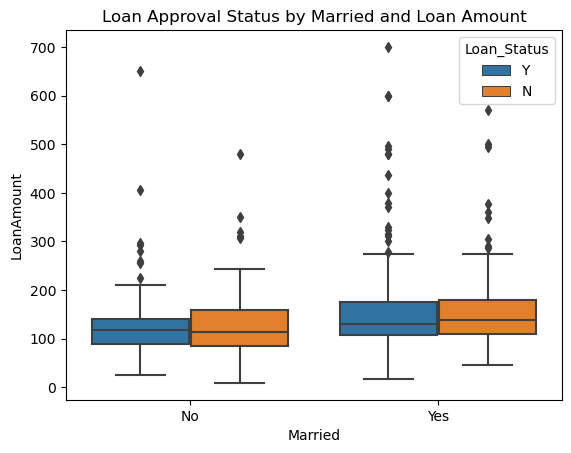

In [17]:
sns.boxplot(x='Married', y='LoanAmount', hue='Loan_Status', data=train_data)
plt.title('Loan Approval Status by Married and Loan Amount')
plt.show()

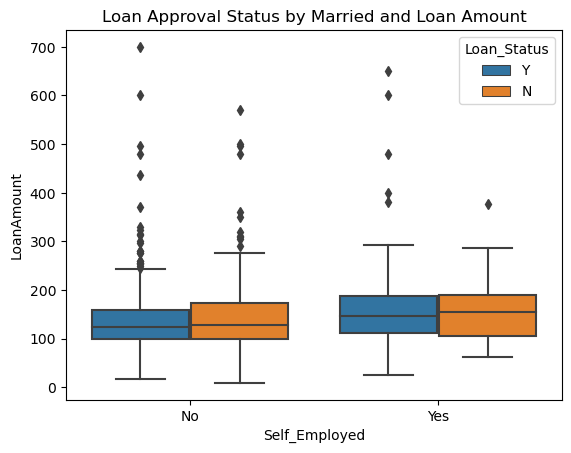

In [18]:
sns.boxplot(x='Self_Employed', y='LoanAmount', hue='Loan_Status', data=train_data)
plt.title('Loan Approval Status by Married and Loan Amount')
plt.show()

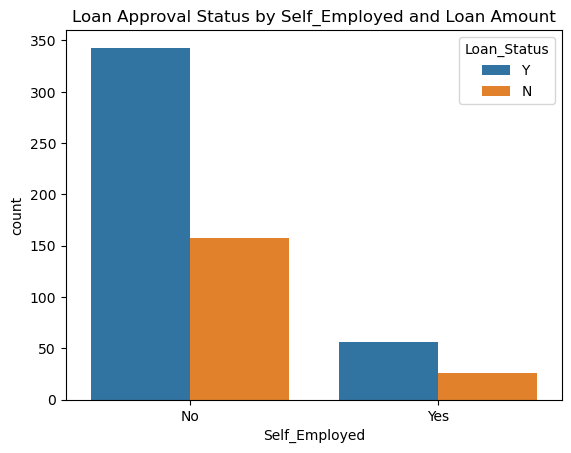

In [19]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=train_data)
plt.title('Loan Approval Status by Self_Employed and Loan Amount')
plt.show()

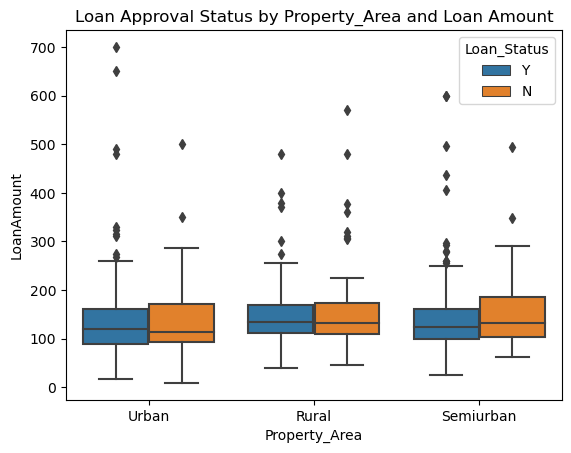

In [20]:
sns.boxplot(x='Property_Area', y='LoanAmount', hue='Loan_Status', data=train_data)
plt.title('Loan Approval Status by Property_Area and Loan Amount')
plt.show()

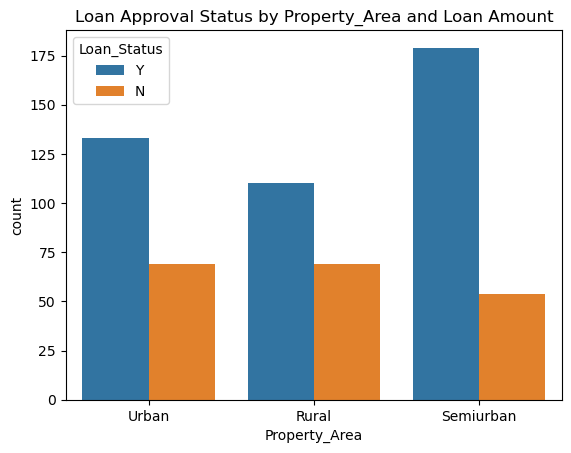

In [21]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=train_data)
plt.title('Loan Approval Status by Property_Area and Loan Amount')
plt.show()

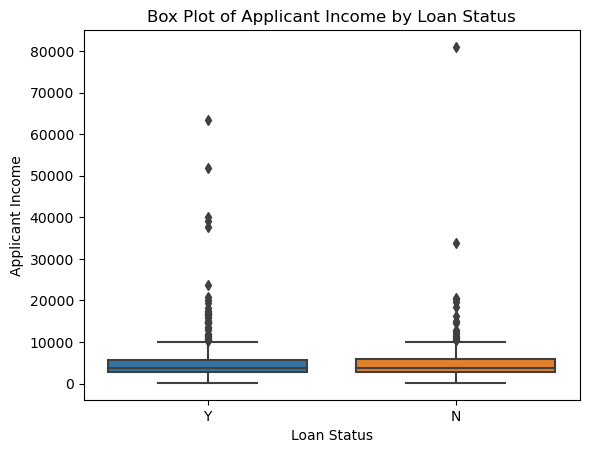

In [22]:

sns.boxplot( x='Loan_Status',y='ApplicantIncome', data=train_data)
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.title('Box Plot of Applicant Income by Loan Status')
plt.show()

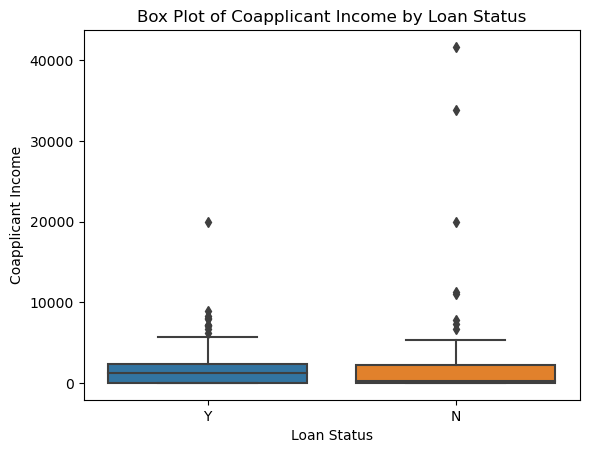

In [23]:
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=train_data)
plt.xlabel('Loan Status')
plt.ylabel('Coapplicant Income')
plt.title('Box Plot of Coapplicant Income by Loan Status')
plt.show()

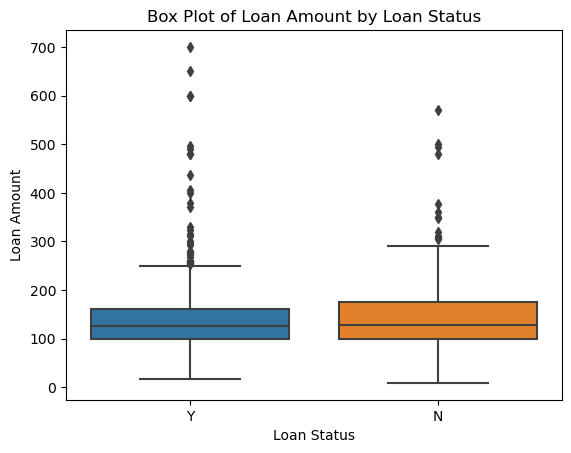

In [24]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=train_data)
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Box Plot of Loan Amount by Loan Status')
plt.show()

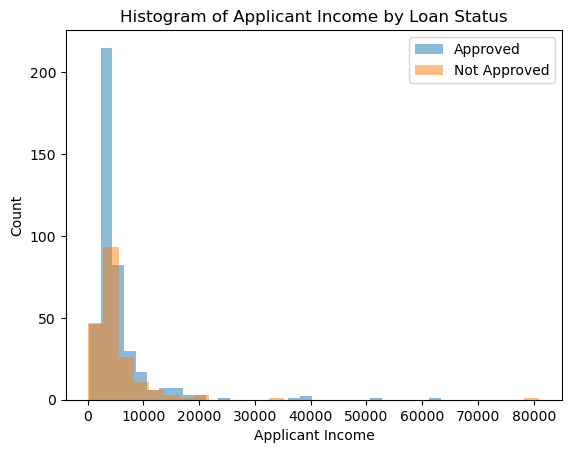

In [25]:
plt.hist(train_data[train_data['Loan_Status'] == 'Y']['ApplicantIncome'], bins=30, alpha=0.5, label='Approved')
plt.hist(train_data[train_data['Loan_Status'] == 'N']['ApplicantIncome'], bins=30, alpha=0.5, label='Not Approved')
plt.xlabel('Applicant Income')
plt.ylabel('Count')
plt.title('Histogram of Applicant Income by Loan Status')
plt.legend()
plt.show()

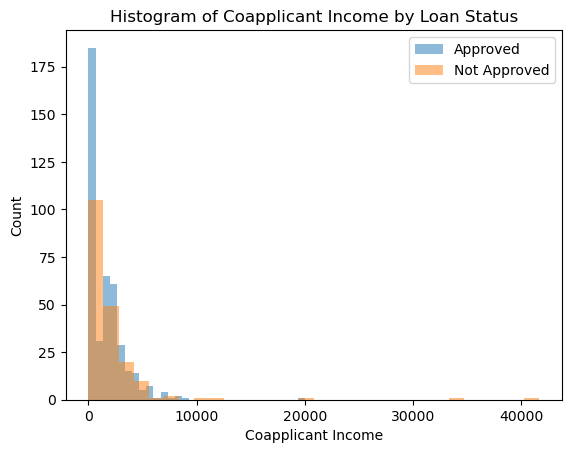

In [26]:
plt.hist(train_data[train_data['Loan_Status'] == 'Y']['CoapplicantIncome'], bins=30, alpha=0.5, label='Approved')
plt.hist(train_data[train_data['Loan_Status'] == 'N']['CoapplicantIncome'], bins=30, alpha=0.5, label='Not Approved')
plt.xlabel('Coapplicant Income')
plt.ylabel('Count')
plt.title('Histogram of Coapplicant Income by Loan Status')
plt.legend()
plt.show()

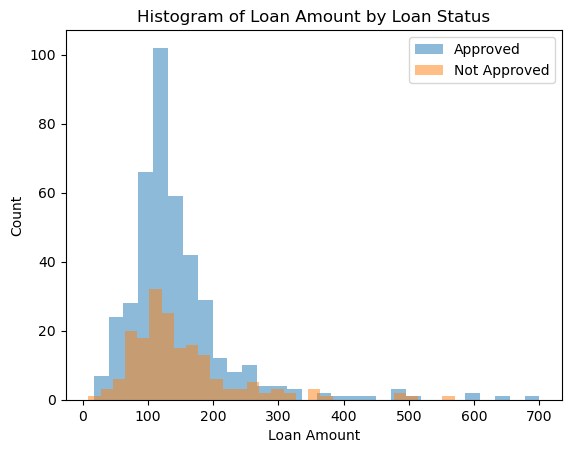

In [27]:
plt.hist(train_data[train_data['Loan_Status'] == 'Y']['LoanAmount'], bins=30, alpha=0.5, label='Approved')
plt.hist(train_data[train_data['Loan_Status'] == 'N']['LoanAmount'], bins=30, alpha=0.5, label='Not Approved')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram of Loan Amount by Loan Status')
plt.legend()
plt.show()


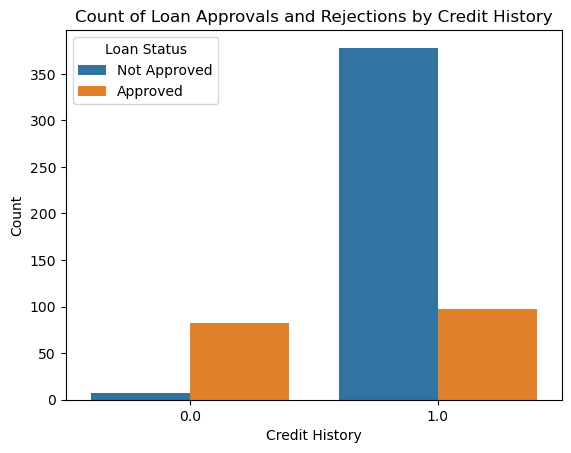

In [28]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=train_data)
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.title('Count of Loan Approvals and Rejections by Credit History')
plt.legend(title='Loan Status', labels=['Not Approved', 'Approved'])
plt.show()

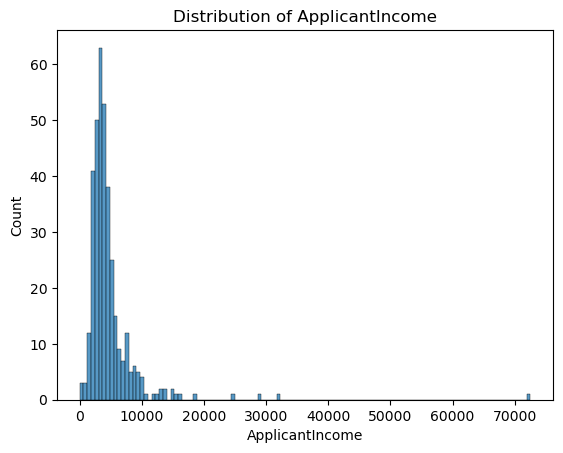

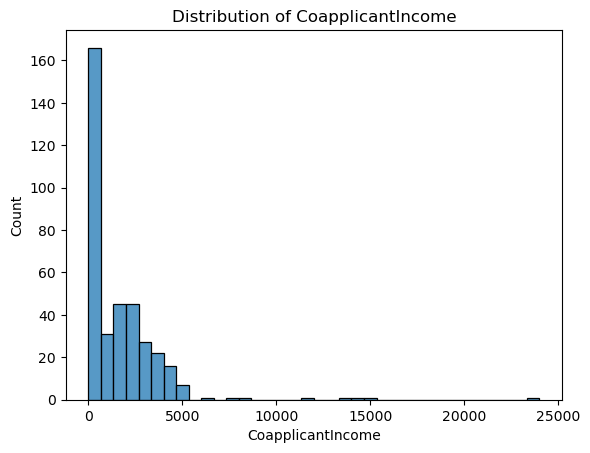

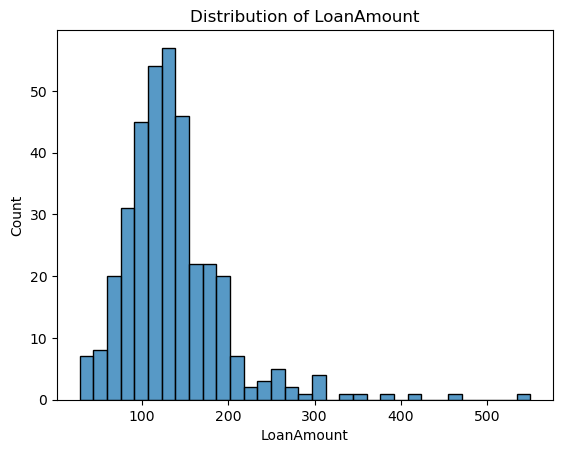

In [29]:
#test_data
num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for feature in num_features:
    plt.figure()
    sns.histplot(test_data[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

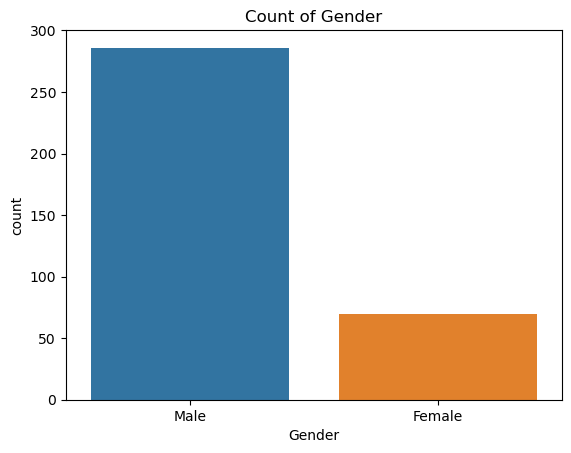

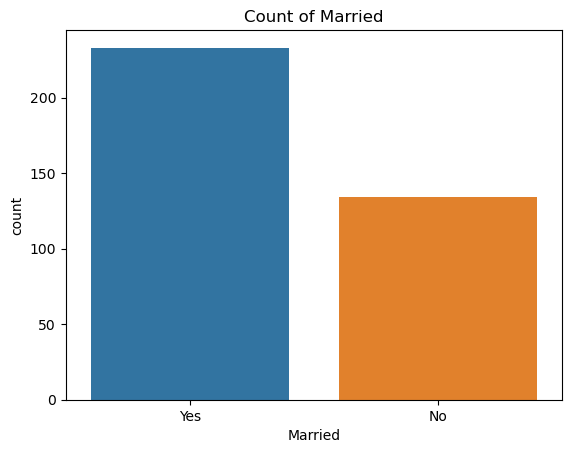

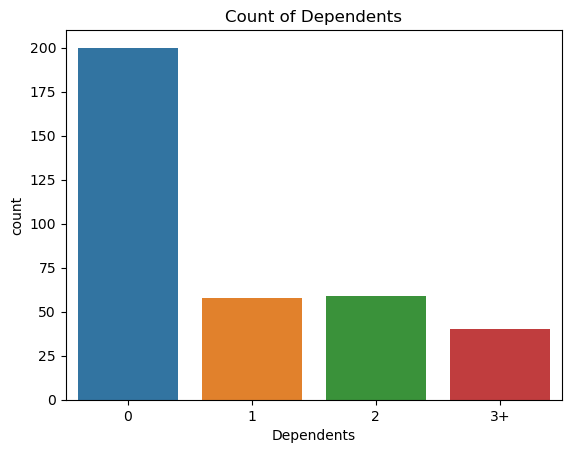

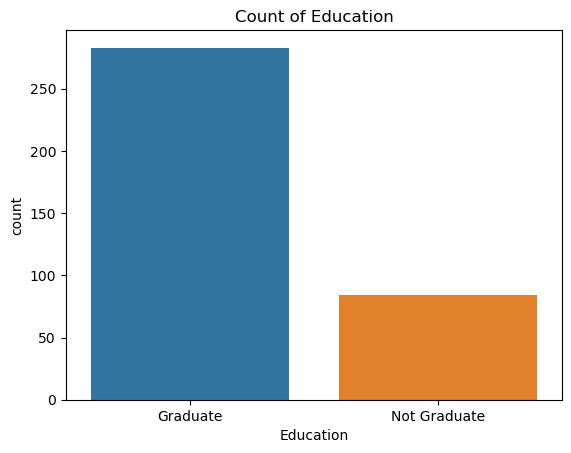

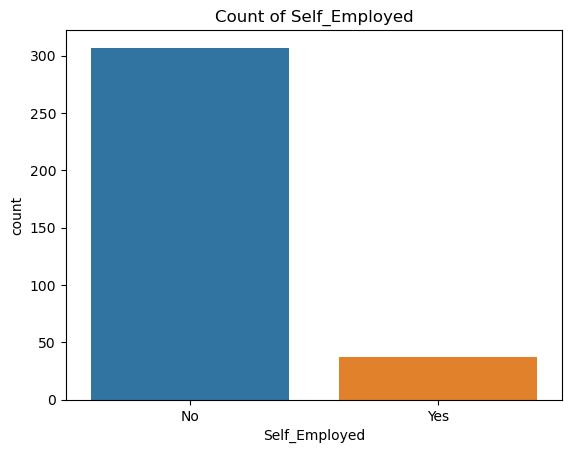

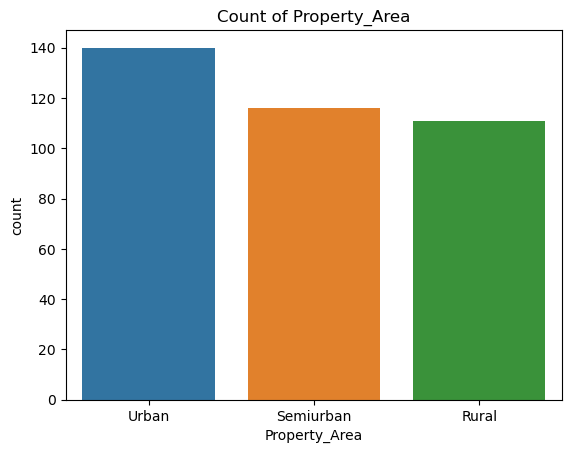

In [30]:
#test_data
cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for feature in cat_features:
    plt.figure()
    sns.countplot(x=feature, data=test_data)
    plt.title(f'Count of {feature}')
    plt.show()

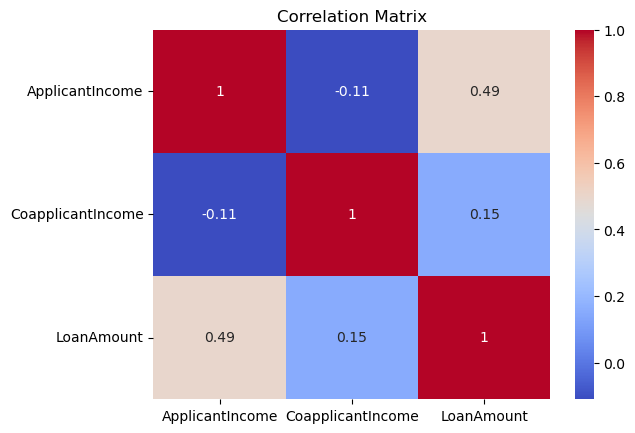

In [31]:
plt.figure()
sns.heatmap(test_data[num_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [32]:
train_data.loc[train_data['Dependents'] == '3+', 'Dependents'] = 3
test_data.loc[test_data['Dependents'] == '3+', 'Dependents'] = 3


In [33]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [34]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [35]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True, axis=0)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True, axis=0)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True, axis=0)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0],inplace=True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(),inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(),inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].median(),inplace=True)



In [36]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [37]:
test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True, axis=0)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace=True, axis=0)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True, axis=0)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(),inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode(),inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].median(),inplace=True)
test_data['Married'].fillna(test_data['Married'].mode(),inplace=True)


In [38]:
train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [39]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train_data['Loan_ID']=label_encoder.fit_transform(train_data['Loan_ID'])
train_data['Gender']=label_encoder.fit_transform(train_data['Gender'])
train_data['Married']=label_encoder.fit_transform(train_data['Married'])
train_data['Education']=label_encoder.fit_transform(train_data['Education'])
train_data['Self_Employed']=label_encoder.fit_transform(train_data['Self_Employed'])
train_data['Property_Area']=label_encoder.fit_transform(train_data['Property_Area'])
train_data['Loan_Status']=label_encoder.fit_transform(train_data['Loan_Status'])


In [41]:
##test_data
test_data['Loan_ID']=label_encoder.fit_transform(test_data['Loan_ID'])
test_data['Gender']=label_encoder.fit_transform(test_data['Gender'])
test_data['Married']=label_encoder.fit_transform(test_data['Married'])
test_data['Education']=label_encoder.fit_transform(test_data['Education'])
test_data['Self_Employed']=label_encoder.fit_transform(test_data['Self_Employed'])
test_data['Property_Area']=label_encoder.fit_transform(test_data['Property_Area'])


In [42]:
train_data['Dependents'] = label_encoder.fit_transform(train_data['Dependents'].astype(str))
test_data['Dependents'] = label_encoder.fit_transform(test_data['Dependents'].astype(str))


In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [44]:
train_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scaler.fit_transform(train_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
test_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scaler.fit_transform(test_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
train_data=train_data.drop('Loan_ID',axis=1)
test_data=test_data.drop('Loan_ID',axis=1)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (614, 11)
Shape of y: (614,)


In [48]:
#Logistic Regression#train_data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is ',accuracy_score(y_test,y_pred))
print('precision is ',precision_score(y_test,y_pred))
print('Recall is ',recall_score(y_test,y_pred))
print('f1 score is ',f1_score(y_test,y_pred))
print("Confusion Matrix:")
confusion_matrix(y_test,y_pred)

Accuracy is  0.7886178861788617
precision is  0.7596153846153846
Recall is  0.9875
f1 score is  0.8586956521739131
Confusion Matrix:


C:\Users\aswan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[18, 25],
       [ 1, 79]], dtype=int64)

In [49]:
#DecisionTree

In [50]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred1 = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print('Accuracy is ',accuracy_score(y_test,y_pred1))
print('precision is ',precision_score(y_test,y_pred1))
print('Recall is ',recall_score(y_test,y_pred1))
print('f1 score is ',f1_score(y_test,y_pred1))
print("Confusion Matrix:")
confusion_matrix(y_test,y_pred1)

Accuracy is  0.7073170731707317
precision is  0.7682926829268293
Recall is  0.7875
f1 score is  0.7777777777777778
Confusion Matrix:


array([[24, 19],
       [17, 63]], dtype=int64)

In [51]:
#RandomForest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred2 = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print('Accuracy is ',accuracy_score(y_test,y_pred2))
print('precision is ',precision_score(y_test,y_pred2))
print('Recall is ',recall_score(y_test,y_pred2))
print('f1 score is ',f1_score(y_test,y_pred2))
print("Confusion Matrix:")
confusion_matrix(y_test,y_pred2)

Accuracy is  0.7560975609756098
precision is  0.75
Recall is  0.9375
f1 score is  0.8333333333333334
Confusion Matrix:


array([[18, 25],
       [ 5, 75]], dtype=int64)

In [53]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred3 =model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
cm = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.7479674796747967
Precision: 0.7634408602150538
Recall: 0.8875
F1-Score: 0.8208092485549132
Confusion Matrix:
[[21 22]
 [ 9 71]]


In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(5), int32(7)
memory usage: 40.9 KB


In [55]:
from sklearn.model_selection import KFold
kfold_validation=KFold(10)
for train_index,test_index in kfold_validation.split(X,y):
    print('Training index :',train_index)
    print('Testing index :',test_index)

Training index : [ 62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 3

In [56]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(model,X,y,cv=kfold_validation)

In [57]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10)
for train_index,test_index in skfold_validator.split(X,y):
    print('Training index :',train_index)
    print('Testing index :',test_index)

Training index : [ 53  54  57  62  63  64  65  66  69  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 3

In [58]:
skcv_score=cross_val_score(model,X,y,cv=skfold_validator)

In [59]:
skcv_score

array([0.72580645, 0.72580645, 0.72580645, 0.75806452, 0.7704918 ,
       0.7704918 , 0.86885246, 0.78688525, 0.73770492, 0.78688525])

In [60]:
np.mean(skcv_score)

0.7656795346377577

In [61]:
##modeling

In [62]:
x_test=test_data
predictions = model.predict(x_test)

In [63]:
print(predictions)


[1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0
 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0
 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1]


In [64]:
test_data.shape

(367, 11)

In [65]:
predictions.shape

(367,)

In [67]:
test_data=pd.read_csv('test_lAUu6dG.csv')
submission = pd.DataFrame({'Loan_ID': test_data['Loan_ID'], 'Loan_Status': predictions})
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
submission.to_csv(r'C:\Users\aswan\OneDrive\Desktop\intership\submission.csv', index=False)